In [1]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import Workbook


In [2]:
file_paths = ['Annuities/A2011_2012.xlsx',
              'Annuities/A2013_2014.xlsx',
              'Annuities/A2015_2016.xlsx',
              'Annuities/A2017.xlsx'
             ]

for file_name in file_paths:
    #Check in the path to pick the file name
    
    #Import the name of the file
    name = pd.read_excel(file_name, engine='openpyxl').iloc[:, : 8]
    
    
    #Name the file columns in each of the datasets
    name.columns = ['Policy_Number', 'Membership_Number', 'Gender', 'annuity_type', 
              'monthly_annuity_amount', 'premium', 'Date_of_Birth', 'Issue_Date'
                   ]
    
    # Convert the given columns into datetime
    name[['Date_of_Birth', 
          'Issue_Date'
         ]] = name[['Date_of_Birth',
                    'Issue_Date'
                   ]].apply(pd.to_datetime,
                            format='%Y-%m-%d',
                            errors='coerce')
  
    # Convert the Annual Premium and Level of Cover to Numeric
    name[['monthly_annuity_amount', 
          'premium'
         ]] = name[['monthly_annuity_amount', 
                    'premium'
                   ]].apply(pd.to_numeric,
                            downcast = 'signed',
                            errors='coerce')
    
    # Create the Year Column 
    name['year']= name['Issue_Date'].dt.strftime('%Y').astype('int64', errors= "ignore")
    
    # Create new Age Column
    name['age']=name['Issue_Date'].dt.year-name['Date_of_Birth'].dt.year
    
    # Create Age Group Column
    bins = [0, 21, 31, 41, 51, 61, 71, 110]
    labels = ['1-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-109']
    name ['agegroup'] = pd.cut(name['age'], bins = bins, labels=labels, right = False )
    
    # Delete Empty Rows
    name = name.dropna(thresh=4)
    
    # Fill empty values on the year column
    name = name.fillna(method= 'ffill').fillna(method= 'bfill')
    
    globals()[file_name.split('/')[-1].split('.')[0]] = name
    
    print(name.shape)
    #print(name.sample(10))
    
    

(1915, 11)
(9004, 11)
(13274, 11)
(9834, 11)


In [3]:
# Concatenate the datasets into one dataframe
annuity = pd.concat([A2011_2012, 
                A2013_2014, 
                A2015_2016, 
                A2017
               ], 
               ignore_index=True)

print(annuity.shape)
annuity

(34027, 11)


,Policy_Number,Membership_Number,Gender,annuity_type,monthly_annuity_amount,premium,Date_of_Birth,Issue_Date,year,age,agegroup
0,POLICY NUMBER,MEMBER M'SHIP,GENDER,ANNUTY TYPE,5302.00,7.431990e+05,1956-01-01,2003-08-01,2003,47.0,41-50
1,POLICY NUMBER,1,F,IMMEDIATE,5302.00,7.431990e+05,1956-01-01,2003-08-01,2003,47.0,41-50
2,POLICY NUMBER,2,M,IMMEDIATE,12559.95,1.177238e+06,1938-01-01,2001-08-01,2001,63.0,61-70
3,POLICY NUMBER,3,M,IMMEDIATE,1260.00,1.418796e+05,1932-10-07,1992-12-01,1992,60.0,51-60
4,POLICY NUMBER,4,M,IMMEDIATE,6419.50,7.685980e+05,1942-06-26,2001-01-01,2001,59.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...
34022,POLICY NUMBER,MEMBER M'SHIP,M,Joint - Last Survivor - Immediate,6873.00,7.364603e+05,1939-01-01,2010-11-01,2010,71.0,71-109
34023,POLICY NUMBER,MEMBER M'SHIP,M,Joint - Last Survivor - Immediate,8490.00,1.060231e+06,1951-01-21,2010-11-01,2010,59.0,51-60
34024,POLICY NUMBER,MEMBER M'SHIP,F,Single - Immediate,37880.00,4.268123e+06,1956-04-30,2011-01-01,2011,55.0,51-60
34025,POLICY NUMBER,MEMBER M'SHIP,M,Single - Immediate,20442.00,1.992459e+06,1952-01-01,2012-07-01,2012,60.0,51-60


## Annual Number of Claims

Annual Coverage 
 year
1973       4
1974       8
1975       8
1976       4
1977       4
1978      12
1979      20
1980       4
1981       4
1982      20
1983      14
1984      16
1985      20
1986       6
1987       2
1988      12
1989       4
1990      16
1992       5
1993       4
1994      24
1995     465
1996      58
1997      50
1998      45
1999      93
2000      70
2001     188
2002     247
2003     245
2004     223
2005     795
2006     351
2007    2380
2008     949
2009    1885
2010    2107
2011    2465
2012    6480
2013    2573
2014    4669
2015    2571
2016    2894
2017    1994
2018      17
2020       2
Name: year, dtype: int64


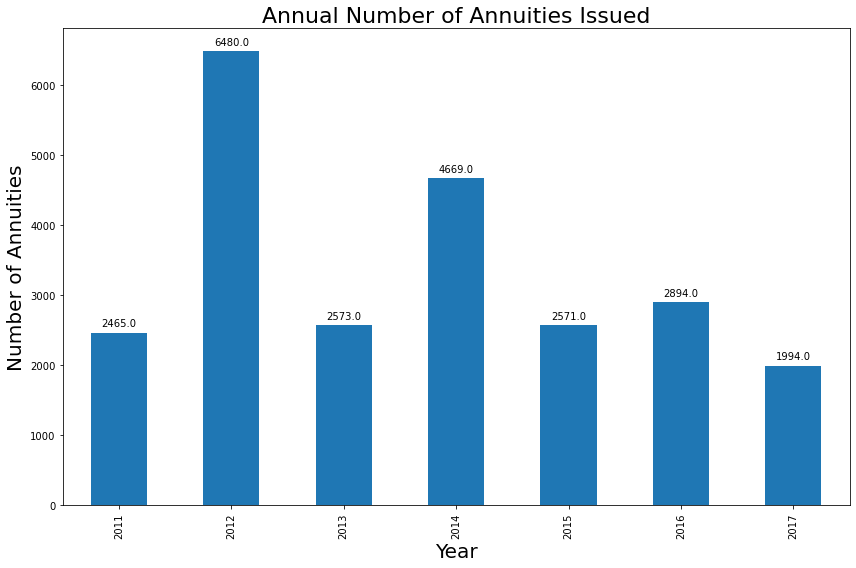

In [4]:
#Plot figures
annuity_numbers= annuity.groupby(['year'])['year'].count()
print("Annual Coverage \n", annuity_numbers)

plt.figure(figsize=(12,8))
ax = annuity_numbers.loc['2011':'2017'].plot(kind='bar')

ax.set_title('Annual Number of Annuities Issued', fontsize = 22)
ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Number of Annuities', fontsize = 20)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()

# Age bands for Annuitants

Annuitants' Age Groups 
 agegroup
1-20       1018
21-30       239
31-40      1100
41-50      2946
51-60     18987
61-70      8747
71-109      990
Name: agegroup, dtype: int64


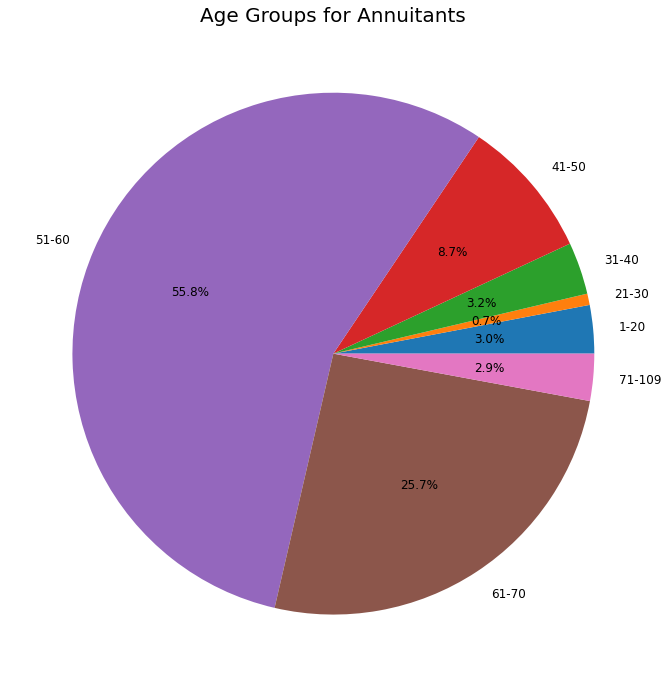

In [5]:
# Age bands, if data available
#Plot figures
age_annuitants= annuity.groupby(['agegroup'])['agegroup'].count()
print("Annuitants' Age Groups \n", age_annuitants)

plt.figure(figsize=(12,12))
ax = age_annuitants.plot(kind='pie', autopct='%1.1f%%', fontsize = 12)

ax.set_title('Age Groups for Annuitants', fontsize = 20)
ax.set_ylabel('')


plt.show()

# Popular Annuity Types

In [6]:
annuity['annuity_type'].describe()

count                      34027
unique                        51
top       IMMEDIATE LIFE ANNUITY
freq                        5527
Name: annuity_type, dtype: object

In [7]:
popular_annuity = annuity.groupby(['annuity_type'])['annuity_type'].count().sort_values(ascending = False)
popular_annuity

# Replace Annuity types with the same meaning
annuity['annuity_type'] = annuity['annuity_type'
                                 ].replace(['IMMEDIATE',
                                            'Immediate',
                                           'Immediate,'], 
                                           'IMMEDIATE LIFE ANNUITY')

annuity['annuity_type'] = annuity['annuity_type'
                                 ].replace(['Single - Immediate',
                                            'SINGLE IMMEDIATE',
                                            'Single (Immediate)',
                                            'SINGLE-IMMEDIATE'
                                           ], 
                                           'Immediate(Single Life)')

annuity['annuity_type'] = annuity['annuity_type'
                                 ].replace(['Joint - Last Survivor - Immediate',
                                            'JOINT-LAST SURVIVIOR-IMMEDIATE',
                                            'JOINT-LAST SURVIVIOR-IMMEDIATE',
                                           ], 
                                           'JOINT-LAST SURVIVOR-IMMEDIATE')
annuity['annuity_type'] = annuity['annuity_type'
                                 ].replace(['SINGLE LIFE',
                                            'JSINGLE',
                                            'Single',
                                            'SINGLE LIFE RP'
                                            'SINGLE'
                                           ], 
                                           'Single Life')

popular_annuity = annuity.groupby(['annuity_type'])['annuity_type'].count().sort_values(ascending = False)
popular_annuity

# popular_annuity.to_csv(r'summary/popular_annuity.csv')

annuity_type
IMMEDIATE LIFE ANNUITY                 12896
Immediate(Single Life)                 10607
JOINT-LAST SURVIVOR-IMMEDIATE           2525
Immediate(Joint Life)                   2255
DEFERRED LIFE ANNUITY                   1751
IMMEDIATE REVERSIONARY LIFE ANNUITY     1103
IMMEDIATE CERTAIN ANNUITY               1071
Single Life                              745
Joint (Immediate)                        171
SINGLE                                   165
Immediate Annuity                        120
Joint                                     83
IMMEDIATE ANNUITY                         67
ANNUITY CERTAIN                           67
Joint Life                                60
JOINT                                     59
ANNUTY TYPE                               54
SINGLE LIFE RP                            46
I                                         41
JOINT LIFE RP                             28
JOINT LIFE                                27
Annuity Certain                           

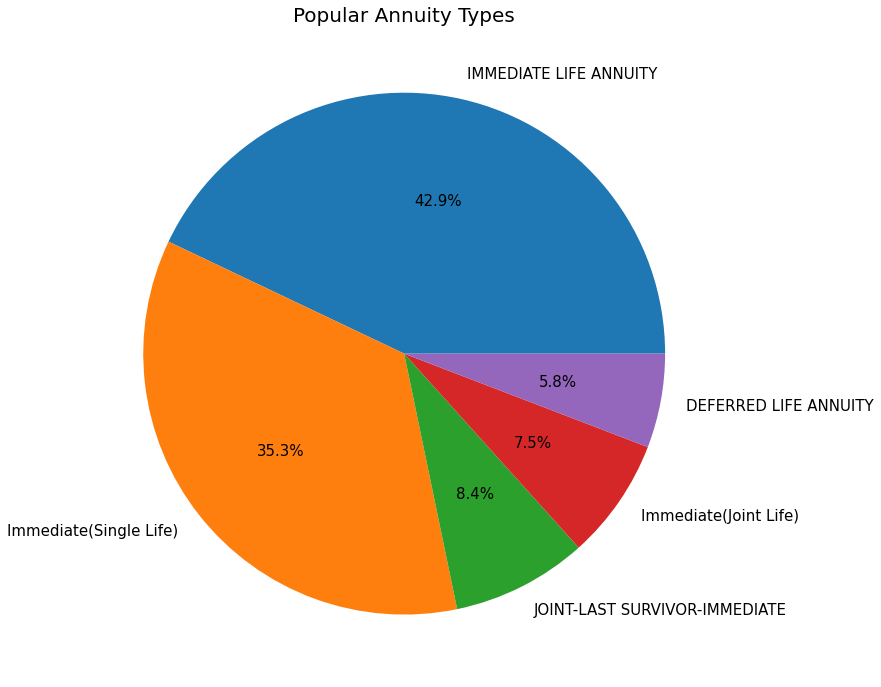

In [8]:
plt.figure(figsize=(12,12))
ax = popular_annuity[:5].plot(kind='pie', autopct='%1.1f%%',fontsize = 15)

ax.set_title('Popular Annuity Types', fontsize = 20)
ax.set_ylabel('')


plt.show()

# Single Premium Bands

count     33730
unique       10
top       2M-5M
freq       8022
Name: premium_levels, dtype: object
Office Premium Bands 
 premium_levels
<200k        4324
200k-500k    3074
500k-750k    2556
750k-1M      2895
1M-1.5M      5249
1.5M-2M      3320
2M-5M        8022
5M-7.5M      2119
7.5M-10M      788
Over 10M     1383
Name: premium_levels, dtype: int64


Text(0.5, 1.0, 'Annual Premium Bands')

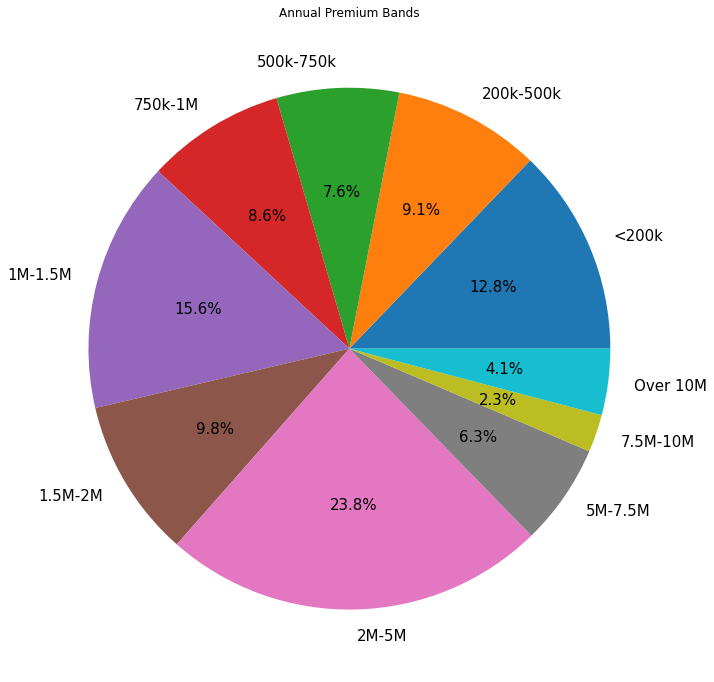

In [9]:
# Create Premium Bands
bins = [0, 200000, 500000, 750000, 1000000, 1500000, 2000000, 5000000, 7500000, 10000000, 100000000]
labels = ['<200k', '200k-500k', '500k-750k', '750k-1M', '1M-1.5M', '1.5M-2M', '2M-5M', '5M-7.5M', '7.5M-10M', 'Over 10M']
annuity['premium_levels'] = pd.cut(annuity['premium'], bins = bins, labels=labels, right = False )
print(annuity['premium_levels'].describe())

premium_levels = annuity.groupby(['premium_levels'])['premium_levels'].count()
print('Office Premium Bands \n', premium_levels)
plt.figure(figsize=(12,12))
ax = premium_levels.plot(kind='pie', autopct='%1.1f%%', fontsize = 15)
ax.set_ylabel('')

ax.set_title('Annual Premium Bands')
# ax.set_xlabel('Annual Premiums')
# ax.set_ylabel('Number of Policies')

count     34026
unique       11
top        <10k
freq      12245
Name: sum_assured_levels, dtype: object
Monthly Annuities 
 sum_assured_levels
<10k         12245
10k-20k       9090
20k-30k       3962
30k-40k       2168
40k-50k       1610
50k-60k       1076
60k-70k        680
70k-80k        929
80k-90k        357
90k-100k       327
Over 100k     1582
Name: sum_assured_levels, dtype: int64


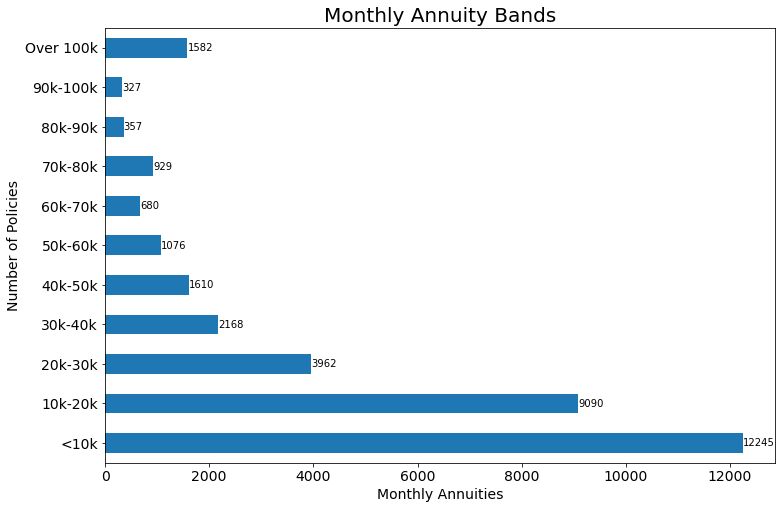

In [10]:
# Create MOnthly Annuities
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 5000000]
labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', 'Over 100k']
annuity['sum_assured_levels'] = pd.cut(annuity['monthly_annuity_amount'], bins = bins, labels=labels, right = False )
print(annuity['sum_assured_levels'].describe())

sum_assured = annuity.groupby(['sum_assured_levels'])['sum_assured_levels'].count()
print('Monthly Annuities \n', sum_assured)
plt.figure(figsize=(12,8))
ax = sum_assured.plot(kind='barh', fontsize = 14)

ax.set_title('Monthly Annuity Bands', fontsize = 20)
ax.set_xlabel('Monthly Annuities', fontsize = 14)
ax.set_ylabel('Number of Policies', fontsize = 14)

for i, v in enumerate(sum_assured):
    ax.text(v+0.2, i, str(round(v, 2)), va="center")

plt.show()
# autolabel(ax)

In [11]:
annuity.to_csv(r'combined_csv/annuity.csv')

In [12]:
file_paths = ['Annuities/D2011_2012.xlsx',
              'Annuities/D2013_2014.xlsx',
              'Annuities/D2015_2016.xlsx',
              'Annuities/D2017.xlsx'
             ]

for file_name in file_paths:
    #Check in the path to pick the file name
    
    #Import the name of the file
    name = pd.read_excel(file_name, engine='openpyxl').iloc[:, : 11]
    
    
    #Name the file columns in each of the datasets
    name.columns = ['Policy_Number', 'Membership_Number', 'Gender', 'annuity_type', 
              'monthly_annuity_amount', 'premium', 'Date_of_Birth', 'Issue_Date',
                    'date_of_death', 'date_reported', 'cause_of_death'
                   ]
    
    # Convert the given columns into datetime
    name[['Date_of_Birth', 
          'Issue_Date',
          'date_of_death',
          'date_reported'
         ]] = name[['Date_of_Birth',
                    'Issue_Date',
                    'date_of_death',
                    'date_reported'
                   ]].apply(pd.to_datetime,
                            format='%Y-%m-%d',
                            errors='coerce')
  
    # Convert the Annual Premium and Level of Cover to Numeric
    name[['monthly_annuity_amount', 
          'premium'
         ]] = name[['monthly_annuity_amount', 
                    'premium'
                   ]].apply(pd.to_numeric,
                            downcast = 'signed',
                            errors='coerce')
    
    # Create the Year Column 
    name['year']= name['Issue_Date'].dt.strftime('%Y').astype('int64', errors= "ignore")
    
    # Create new Age Column
    name['age']=name['Issue_Date'].dt.year-name['Date_of_Birth'].dt.year
    
    # Create Age Group Column
    bins = [0, 21, 31, 41, 51, 61, 71, 110]
    labels = ['1-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-109']
    name ['agegroup'] = pd.cut(name['age'], bins = bins, labels=labels, right = False )
    
    # Delete Empty Rows
    name = name.dropna(thresh=4)
    
    # Fill empty values on the year column
    name = name.fillna(method= 'ffill').fillna(method= 'bfill')
    
    globals()[file_name.split('/')[-1].split('.')[0]] = name
    
    print(name.shape)
    #print(name.sample(10))
    
    

(19, 14)
(100, 14)
(156, 14)
(92, 14)


In [13]:
# Concatenate the datasets into one dataframe
annuity_deaths = pd.concat([D2011_2012, 
                D2013_2014, 
                D2015_2016, 
                D2017
               ], 
               ignore_index=True)

print(annuity_deaths.shape)
annuity_deaths.head(20)

(367, 14)


,Policy_Number,Membership_Number,Gender,annuity_type,monthly_annuity_amount,premium,Date_of_Birth,Issue_Date,date_of_death,date_reported,cause_of_death,year,age,agegroup
0,POLICY NUMBER,MEMBER M'SHIP,GENDER,ANNUTY TYPE,23559.0,2745127.0,1961-01-01,2012-07-01,2012-09-18,2012-10-01,CAUSE OF,2012,51.0,51-60
1,POLICY NUMBER,122,M,IMMEDIATE,23559.0,2745127.0,1961-01-01,2012-07-01,2012-09-18,2012-10-01,DIABETES,2012,51.0,51-60
2,POLICY NUMBER,MEMBER M'SHIP,GENDER,ANNUTY TYPE,23559.0,2745127.0,1961-01-01,2012-07-01,2012-09-18,2012-10-01,CAUSE OF,2012,51.0,51-60
3,POLICY NUMBER,MEMBER M'SHIP,GENDER,ANNUTY TYPE,23559.0,2745127.0,1961-01-01,2012-07-01,2012-09-18,2012-10-01,CAUSE OF,2012,51.0,51-60
4,POLICY NUMBER,MEMBER M'SHIP,GENDER,ANNUTY TYPE,23559.0,2745127.0,1961-01-01,2012-07-01,2012-09-18,2012-10-01,CAUSE OF,2012,51.0,51-60
5,POLICY NUMBER,MEMBER M'SHIP,GENDER,ANNUTY TYPE,23559.0,2745127.0,1961-01-01,2012-07-01,2012-09-18,2012-10-01,CAUSE OF,2012,51.0,51-60
6,POLICY NUMBER,MEMBER M'SHIP,GENDER,ANNUTY TYPE,23559.0,2745127.0,1961-01-01,2012-07-01,2012-09-18,2012-10-01,CAUSE OF,2012,51.0,51-60
7,POLICY NUMBER,MEMBER M'SHIP,GENDER,ANNUTY TYPE,23559.0,2745127.0,1961-01-01,2012-07-01,2012-09-18,2012-10-01,CAUSE OF,2012,51.0,51-60
8,POLICY NUMBER,MEMBER M'SHIP,GENDER,ANNUTY TYPE,23559.0,2745127.0,1961-01-01,2012-07-01,2012-09-18,2012-10-01,CAUSE OF,2012,51.0,51-60
9,POLICY NUMBER,MEMBER M'SHIP,GENDER,ANNUTY TYPE,23559.0,2745127.0,1961-01-01,2012-07-01,2012-09-18,2012-10-01,CAUSE OF,2012,51.0,51-60


count      365
unique      10
top       <10k
freq       121
Name: sum_assured_levels, dtype: object
Monthly Annuities 
 sum_assured_levels
<10k         121
10k-20k      104
20k-30k       73
30k-40k       15
40k-50k        9
50k-60k       14
60k-70k       16
70k-80k        5
80k-90k        0
90k-100k       1
Over 100k      7
Name: sum_assured_levels, dtype: int64


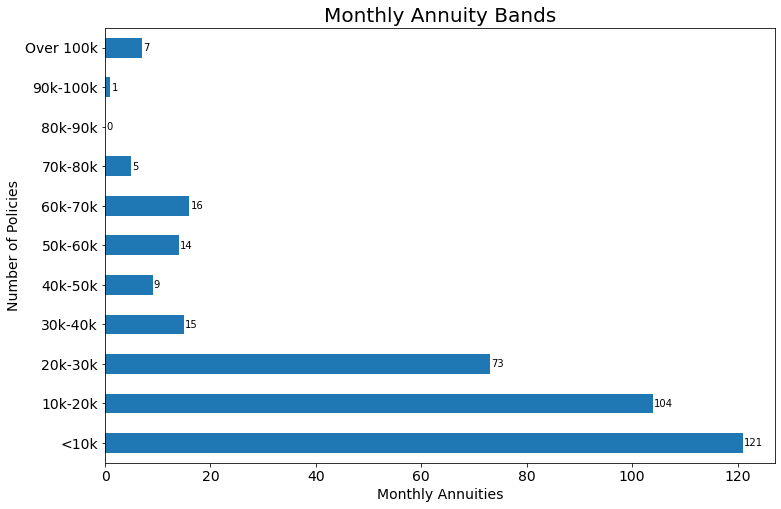

In [14]:
# Create MOnthly Annuities
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 5000000]
labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', 'Over 100k']
annuity_deaths['sum_assured_levels'] = pd.cut(annuity_deaths['monthly_annuity_amount'], bins = bins, labels=labels, right = False )
print(annuity_deaths['sum_assured_levels'].describe())

sum_assured = annuity_deaths.groupby(['sum_assured_levels'])['sum_assured_levels'].count()
print('Monthly Annuities \n', sum_assured)
plt.figure(figsize=(12,8))
ax = sum_assured.plot(kind='barh', fontsize = 14)

ax.set_title('Monthly Annuity Bands', fontsize = 20)
ax.set_xlabel('Monthly Annuities', fontsize = 14)
ax.set_ylabel('Number of Policies', fontsize = 14)

for i, v in enumerate(sum_assured):
    ax.text(v+0.2, i, str(round(v, 2)), va="center")

plt.show()
# autolabel(ax)

Length of time before an annuity ceases

The data available provides limited information about maturity dates for annuities (When the payment starts). That makes it hard to find the period between start of payments and death.

In [15]:
annuity_deaths.to_csv(r'combined_csv/annuity_deaths.csv')